# Step#0: Problem Statement

Let's assume that you work as a consultant to a start-up company that was looking to develp a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. number of units sold. You thought a polynomial regression model might be a good candidate.

# Step#1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step#2: Importing Dataset

In [3]:
cost_df=pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\ML-Regression\ML Regression Course Package\5. Polynomial Regression\EconomiesOfScale.csv')

In [4]:
cost_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [5]:
cost_df.tail(10)

,Number of Units,Manufacturing Cost
990,7.900366,27.595130
991,7.927897,24.700869
992,7.974248,24.000024
993,7.998722,22.349817
994,8.087334,26.569888
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [6]:
cost_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [7]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# Step#3: Visualizing Dataset

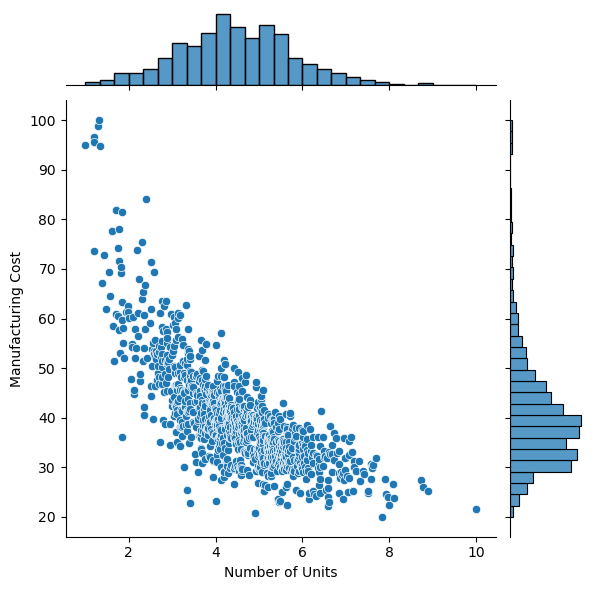

In [8]:
sns.jointplot(x='Number of Units',y='Manufacturing Cost',data=cost_df)

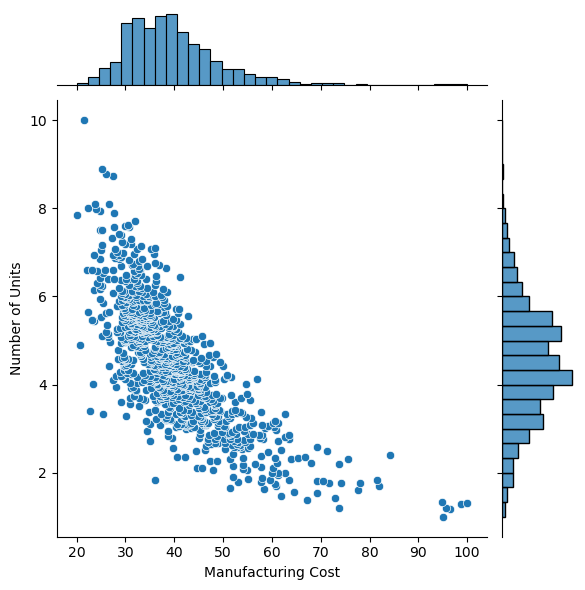

In [9]:
sns.jointplot(x='Manufacturing Cost',y='Number of Units',data=cost_df)

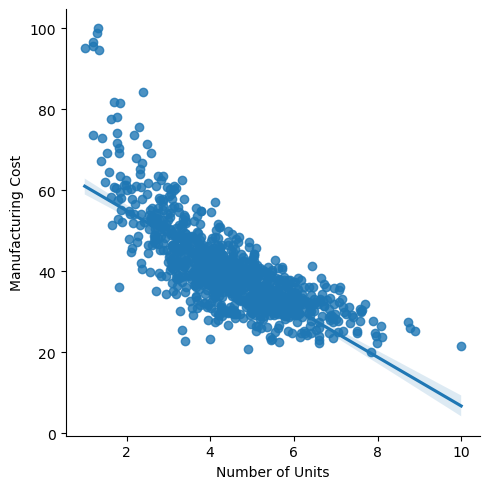

In [10]:
sns.lmplot(x='Number of Units', y='Manufacturing Cost', data=cost_df)

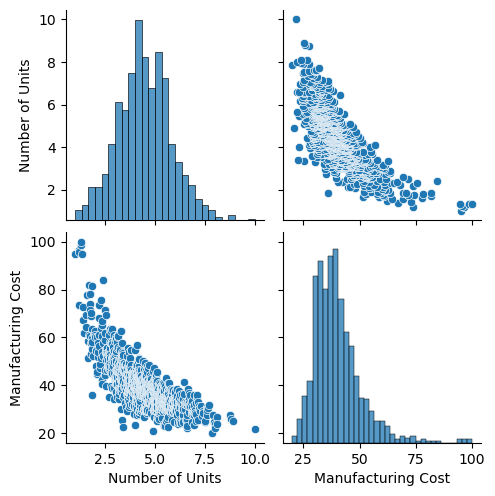

In [11]:
sns.pairplot(cost_df)

# Step#5: Creating Training Datasets

In [12]:
X = cost_df[['Number of Units']]

In [16]:
y = cost_df[['Manufacturing Cost']]

In [17]:
X_train=X
y_train=y

In [18]:
y_train.shape

(1000, 1)

In [19]:
X_train.shape

(1000, 1)

# (Solution#1: Linear Assumption)

# Step#5: Model Training

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
print('Model Coefficient(m): ', regressor.coef_)
print('Model Intercept(b): ', regressor.intercept_)

Model Coefficient(m):  [[-6.0333683]]
Model Intercept(b):  [67.03904193]


# Step#6: Visualizing the Results:

Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

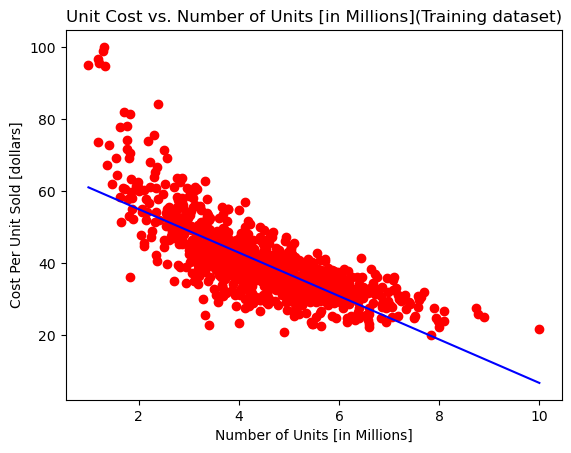

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

In [24]:
#when fit_intercept=False 
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=False)

In [25]:
regressor.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [26]:
print('Model Coefficient(m): ', regressor.coef_)
print('Model Intercept(b): ', regressor.intercept_) #giving positive slope, which is not expected

Model Coefficient(m):  [[7.72782912]]
Model Intercept(b):  0.0


Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

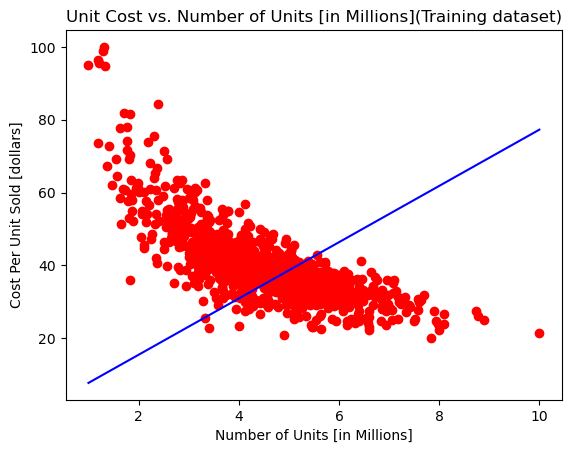

In [27]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

In [28]:
#reverting to fit_intercept=True to get expected slope
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)

In [29]:
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
print('Model Coefficient(m): ', regressor.coef_)
print('Model Intercept(b): ', regressor.intercept_) #giving positive slope, which is not expected

Model Coefficient(m):  [[-6.0333683]]
Model Intercept(b):  [67.03904193]


Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

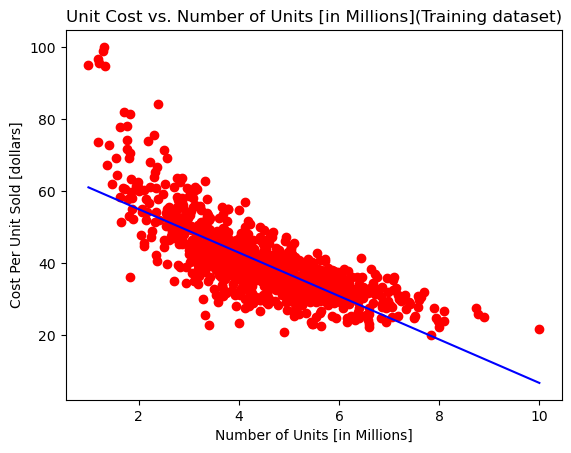

In [31]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

# (Solution#2 Polynomial Assumption)

# Step#5: Training the Model

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=4)

In [33]:
X_columns = poly_regressor.fit_transform(X_train)

In [34]:
print(X_columns)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 1.18599365e+00 1.40658094e+00 1.66819606e+00
  1.97846993e+00]
 [1.00000000e+00 1.19149864e+00 1.41966901e+00 1.69153369e+00
  2.01546010e+00]
 ...
 [1.00000000e+00 8.78088812e+00 7.71039962e+01 6.77041565e+02
  5.94502623e+03]
 [1.00000000e+00 8.89769971e+00 7.91690601e+01 7.04422522e+02
  6.26774007e+03]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04]]


In [35]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [36]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[ 0.00000000e+00 -5.43308190e+01  1.22452385e+01 -1.29910949e+00
   5.12914120e-02]]
Linear Model Coefficient (b):  [131.71715954]


# Step#6: Visualizing the Results

In [37]:
X_train.shape

(1000, 1)

In [38]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

In [39]:
y_predict.shape

(1000, 1)

Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

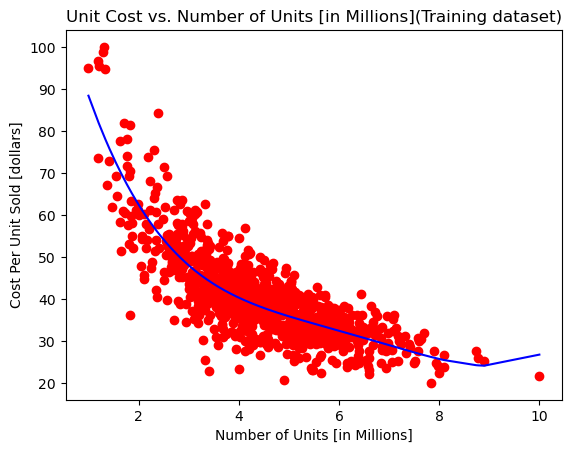

In [40]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')